# EDA
Question 1 : What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each.
- | **Aspect**           | **Artificial Intelligence (AI)**                                                            | **Machine Learning (ML)**                                                            | **Deep Learning (DL)**                                                                                         | **Data Science**                                                                                                      |
| -------------------- | ------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Scope**            | Broadest field – aims to create machines that can mimic human intelligence.                 | Subset of AI – focuses on enabling machines to learn from data.                      | Subset of ML – focuses on using neural networks with many layers for complex data.                             | Broader field – focuses on extracting insights and knowledge from data using analytical and computational techniques. |
| **Techniques Used**  | Rule-based systems, search algorithms, expert systems, logic, and knowledge representation. | Statistical models, regression, classification, clustering, decision trees, and SVM. | Artificial Neural Networks (ANNs), Convolutional Neural Networks (CNNs), and Recurrent Neural Networks (RNNs). | Data cleaning, data visualization, statistical analysis, machine learning, and predictive modeling.                   |
| **Data Requirement** | Can work with structured or symbolic data; not always data-driven.                          | Requires structured or semi-structured data for training models.                     | Requires large amounts of labeled data and high computational power.                                           | Uses both structured and unstructured data for analysis.                                                              |
| **Applications**     | Robotics, expert systems, natural language processing, and game playing.                    | Spam detection, recommendation systems, fraud detection, and predictive analytics.   | Image recognition, speech recognition, autonomous vehicles, and facial recognition.                            | Business intelligence, healthcare analytics, market analysis, and research.                                           |


Question 2: Explain overfitting and underfitting in ML. How can you detect and prevent
them?
(Hint: Discuss bias-variance tradeoff, cross-validation, and regularization techniques.)
- **Definition**
| **Term**         | **Explanation**                                                                                                                                                                                           |
| ---------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Overfitting**  | Occurs when a machine learning model learns the **training data too well**, including its noise and outliers. As a result, it performs **very well on training data** but **poorly on unseen/test data**. |
| **Underfitting** | Happens when a model is **too simple** to capture the underlying pattern of the data. It performs **poorly on both training and test data**.                                                              |
- **Bias-Variance Tradeoff**
| **Concept**  | **Description**                                                                                                      |
| ------------ | -------------------------------------------------------------------------------------------------------------------- |
| **Bias**     | Error due to **simplistic assumptions** in the model — leads to underfitting.                                        |
| **Variance** | Error due to **too much complexity or sensitivity** to training data — leads to overfitting.                         |
| **Tradeoff** | The goal is to find a balance where both bias and variance are minimized — ensuring good generalization to new data. |
- **Detection**
| **Problem**      | **How to Detect**                                                        |
| ---------------- | ------------------------------------------------------------------------ |
| **Overfitting**  | High accuracy on training data but low accuracy on test/validation data. |
| **Underfitting** | Low accuracy on both training and test data.                             |
- **Prevention Method**
| **Technique**                    | **How It Helps**                                                                                         |
| -------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Cross-validation**             | Splits data into multiple folds to test model performance on different subsets, ensuring generalization. |
| **Regularization (L1/L2)**       | Adds a penalty to large model weights to reduce complexity and prevent overfitting.                      |
| **Early Stopping**               | Stops training when validation error starts increasing.                                                  |
| **Pruning (for decision trees)** | Removes unnecessary branches that add complexity.                                                        |
| **Simplify the Model**           | For underfitting, use more complex models or add more features.                                          |
| **Collect More Data**            | More data helps models generalize better and reduces overfitting.                                        |



Question 3:How would you handle missing values in a dataset? Explain at least three
methods with examples.
Hint: Consider deletion, mean/median imputation, and predictive modeling.
- **Introduction**:
In real world datasets, it is common to having missing values due to human error, data corruption or equipment failure. Missing values can negatively affect the acurracy of a machine learning model and may lead to biased or incorrect results. Therefore it essential to handle them properly before performing any data analysis or model training. Below some common and effective techniques to deals with missing data.
 1. **Deletion Method**: This is the simplest method where we remove the row or columns containing missing values. However it is only be used when the missing values only be used when the number of missing values are very small compared to the total dataset, otherwise valuble information might be lost.**Example**: If we have 10000 rows and only 10 rows having missing data, we can safely delete them.  

In [ ]:
df.dropna(inplace=True)

- **Advantages**: Very simple to apply and useful when missing data is minimal.
- **Disadvantages**: Can lead to loss of important information if many rows are deleted.
 2. **Imputation Method**: Instead of deleting data, we can replace missing values with statistical measures such as:
 - Mean - for normally distributed numerical data.
 - Median - for skewed numerical data.
 - Mode - for categorical data.


In [ ]:
#Replacing the missing value in the "age" column with mean.
df["Age"].fillna(df["Age"].mean(), inplace= True)

- **Advantages**: Retains data size and stucture and simple and quick to implement.
- **Disadvantages**: May reduce data variability
- Can introduce bias if missingness is not random.

 3. **Predictive modeling (Model based imputation)**:
 In this method, missing values are predicted using other available features.Foe example, we can use Linear Regression, K- Nearest Neighbors(KNN) or Decisions Trees to estimate missing data.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors== 5)
df_imputed = imputer.fit_transform(df)

- **Advantages**: More accurate than simple impuatation and maintains relationship between features
- **Disadvantages**: Computationally expensive and requires more time and resource implement.

Question 4:What is an imbalanced dataset? Describe two techniques to handle it
(theoretical + practical).
Hint: Discuss SMOTE, Random Under/Oversampling, and class weights in models.
- **Introduction**: In machine learning, an imbalanced dataset occurs when the nubers of samples in one class is much higher than in another class. This imbalance causes the model to become biased toward the majority class, leading to poor performance in predicting the minority rare class.
- For example, The dataset of fraud detection, 98% of transactions may be legitimate , and only 2% may be fraudulent, A model trained on such data may be predicted  "no fraud" for almost every case and still achive high accuracy - but failed in real world detection.
- **Problem caused by imbalanced data**:
- Poor performance for minority class (low recall or F1 score).
- High overall accuracy but misleading result.
- Models become biased toward majority class.
- **Techniques to Handle Imbalanced Datasets**:
 1. **Random Over-sampling and under-sampling techinques**:
 - **Over-sampling**: Increases the number of samples in the minority class by duplicating or synthetically generating new samples.
 - **Under-sampling**: Reduce the number of samples in the majority class to balance the both classes.
 - This helps the model learn features more efficiently.  


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Over-sampling minority class
ros = RandomOverSampler(random_state= 42)
x_res, y_res = ros.fit_resample(x, y)

# Under-sampling majority class
rus = RandomUnderSampler(random_state= 42)
x_res, y_res = rus.fit_resample(x, y)

- **Advantages**: Simple to implement and works well with small datasets.
- **Disadvantages**:
- Over-sampling may cause over-fitting.
- Under-sampling may leads to loss of valuable information.
 2. **SMOTE**(Synthetic Minority Over-sampling Technique)
 - SMOTE is a advanced over-sampling technique that creates synthetic sample for minority class instead of just duplicating exiting ones. It works by:
 - Selecting minority sample.
 - Finding its k-nearest neighbors.
 - Generating new synthetic sample along the line segments joining the sample and its neighbors.
 - This helps the model generalize better and reduces overfitting.


In [ ]:
from imblearn.over_sampling import SMOTE

# Appling SMOTE
smote = SMOTE(random_state = 42)
x_res, y_res = smote.fit_resample(x, y)

- **Advantges**:
- Creates more diverse and realistic synthetic samples.
- Improves model performance on minority class.
- **Disadvantages**:
- May introduce noise if the minority class is highly scattered.
- Slightly computationally expensive.
 3. **Class Weight Adjustment**:
 - Some algorithms like Logistic Regression, SVM and Random Forest allows adjusting class weights to penalize misclassification of minority samples more heavily.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced')
model.fit(x_train, y_train)

Question 5: Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization.
(Hint: Explain impact on distance-based algorithms (e.g., KNN, SVM) and gradient
descent.)
- In machine-learning, feature scaling is the process of bringing all features to a similar scale or range. It is essential data preprocessing step because feature in a dataset may have different units and magnitude.
For example, in a dataset:
- Age ranges from 18-60.
- Income ranges from ₹10,000–₹10,00,000
- **Importance of Feature Scaling**:
- Improves model accuracy - ensure that all features contribute equally to the result.
- Essential for distanced based algorithm - Algorithms like K-Nearest Neighbor(KNN) and Support Vector Machines(SVM) depends on Euclidean distance large scale features dominate distance calculations if not scaled.
- Improves Gradient Descent Convergence - In optimization algoriths(eg. Linear Regression, Neural Network) scaling helps graident decent converges faster by preventing oscillations due to uneven features ranges.
- Prevent numerical instability - Reduce large variations that may causes computation errors in model.
- **Common Feature Scaling Technique**:
### **Table 1: Common Feature Scaling Techniques**

| **Method** | **Formula** | **Range / Effect** | **When to Use** |
|-------------|-------------|--------------------|-----------------|
| **1. Min–Max Scaling (Normalization)** | $X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$.| Scales features to **[0, 1]** range. | When data is **not normally distributed** or bounded (e.g., pixel values). |
| **2. Standardization (Z-score Scaling)** | \$ X' = \frac{X - \mu}{\sigma} $| Centers data around **mean = 0** and **standard deviation = 1**. | When features follow a **normal distribution** or for algorithms assuming Gaussian data. |


---

### **Table 2: Comparison between Min–Max Scaling and Standardization**

| **Aspect** | **Min–Max Scaling** | **Standardization (Z-score)** |
|-------------|--------------------|-------------------------------|
| **Formula** | $( X' = \frac{X - X_{min}}{X_{max} - X_{min}} )$ | \$$( X' = \frac{X - \mu}{\sigma}$$ \) |
| **Output Range** | 0 to 1 | Mean = 0, Std = 1 |
| **Effect on Outliers** | Highly sensitive to outliers | Less affected by outliers |
| **Best For** | Bounded data (e.g., images, sensor readings) | Data with Gaussian distribution |
| **Used In** | Neural Networks, KNN, SVM | Logistic Regression, PCA, Linear Regression |



In [ ]:
# Example
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Min-Max Scaling
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

#Standardization
sc = StandardScaler()
X_std = sc.fit_transform(X)

Question 6: Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?
Hint: Consider categorical variables with ordinal vs. nominal relationships.
- **Introduction**: In machine learning, models can only work with numerical data, not text.
Therefore, categorical variables (such as “Gender”, “Color”, or “Education Level”) must be converted into numerical form.
Two common techniques to achieve this are Label Encoding and One-Hot Encoding.
 1.**Label Encoding**:Label Encoding converts each category into a unique integer value.
It is useful for ordinal data, where the categories have a natural order or ranking.Example:
| Education Level | Encoded Value |
| --------------- | ------------- |
| High School     | 0             |
| Bachelor’s      | 1             |
| Master’s        | 2             |
| PhD             | 3             |


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with ordinal categorical data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor']
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Applying Label Encoding
le = LabelEncoder()
df['Education_Encoded'] = le.fit_transform(df['Education'])

print("\nAfter Label Encoding:\n", df)



Original DataFrame:
       Name    Education
0    Alice  High School
1      Bob     Bachelor
2  Charlie       Master
3    David          PhD
4     Emma     Bachelor

After Label Encoding:
       Name    Education  Education_Encoded
0    Alice  High School                  1
1      Bob     Bachelor                  0
2  Charlie       Master                  2
3    David          PhD                  3
4     Emma     Bachelor                  0


- Here, education levels have a natural order (High School < Bachelor < Master < PhD).
Label Encoding maintains this order by assigning incremental integer values.
- **When to use**:For ordinal categorical features where order matters.
Example: Size (Small, Medium, Large), Education (High School, Bachelor, Master).

 2. **One-Hot Encoding**: One-Hot Encoding converts each category into a binary vector (0 or 1).
Each unique category becomes a new column, and the value is 1 where the category is present.
This is best for nominal data, where there is no natural order among categories.


In [3]:
import pandas as pd

# Sample DataFrame with nominal categorical data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Applying One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Color'])

print("\nAfter One-Hot Encoding:\n", df_encoded)


Original DataFrame:
       Name  Color
0    Alice    Red
1      Bob   Blue
2  Charlie  Green
3    David   Blue
4     Emma    Red

After One-Hot Encoding:
       Name  Color_Blue  Color_Green  Color_Red
0    Alice       False        False       True
1      Bob        True        False      False
2  Charlie       False         True      False
3    David        True        False      False
4     Emma       False        False       True


- Each color is converted into a separate binary column (0 or 1).
This ensures that the model does not assume any order among categories.
- **When to use**: For nominal categorical data where order does not exist.
Example: Gender (Male/Female), Country (India, USA, UK), Color (Red, Blue, Green).

Question 7: Google Play Store Dataset
a). Analyze the relationship between app categories and ratings. Which categories have the
highest/lowest average ratings, and what could be the possible reasons?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)

First 5 Rows of the Dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.

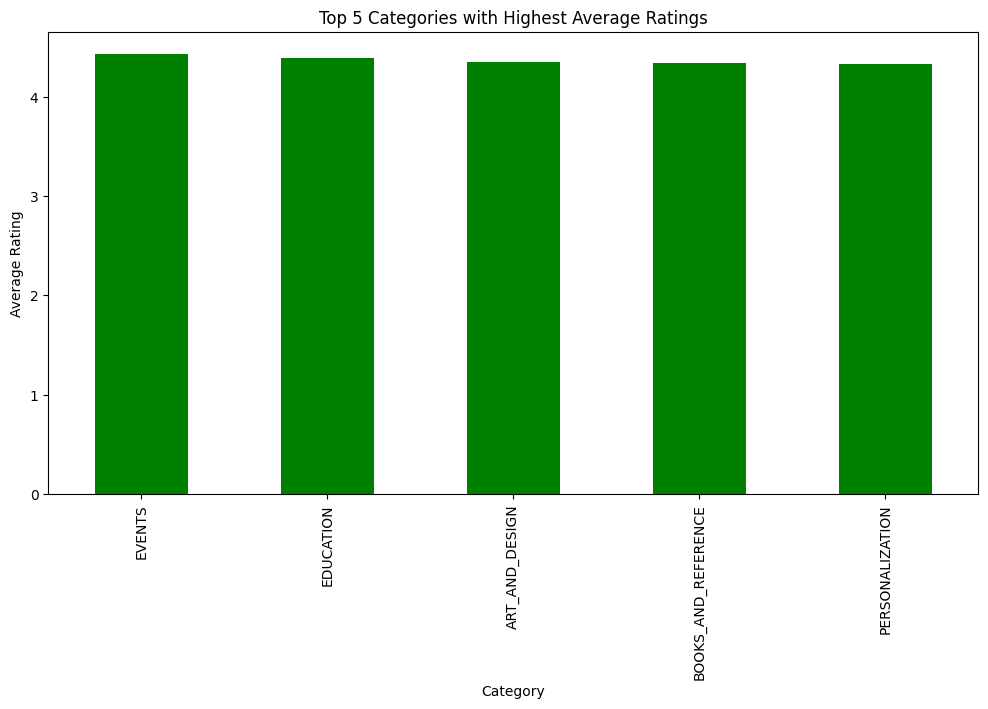

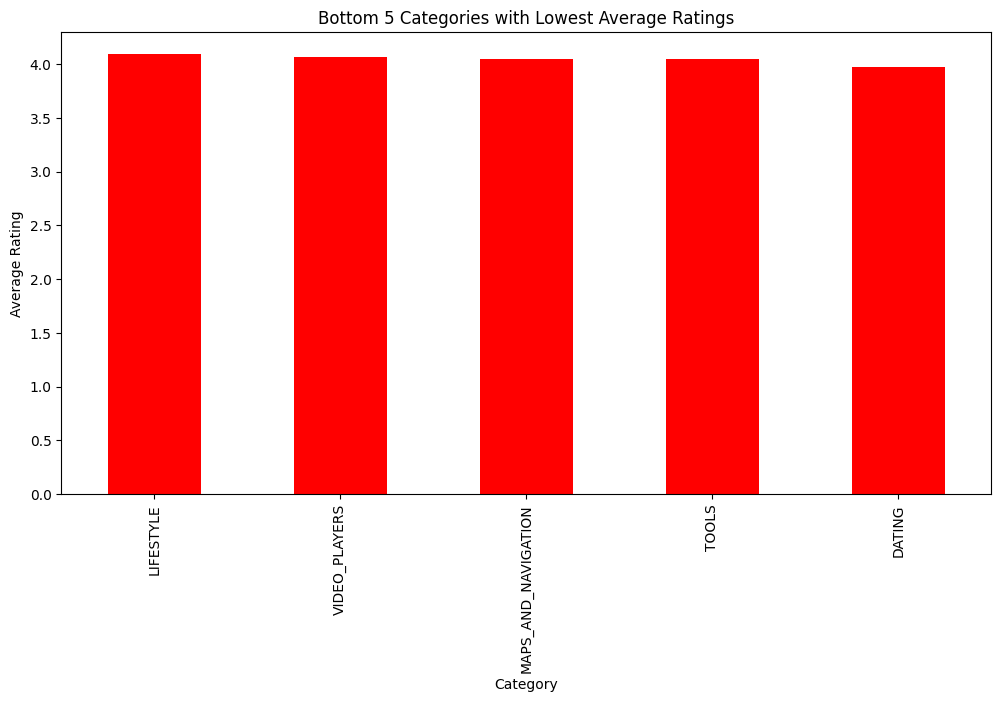

In [4]:

#  Google Play Store Dataset Analysis
# Relationship between App Categories and Ratings

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load dataset (from GitHub repository)
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv"
df = pd.read_csv(url)

# Step 3: Display first few rows
print("First 5 Rows of the Dataset:")
print(df.head())

# Step 4: Data cleaning – handle missing or invalid values
df = df.dropna(subset=['Rating', 'Category'])
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df[df['Rating'] <= 5]   # Ratings should be <= 5

# Step 5: Calculate average rating by category
category_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

print("\nAverage Ratings by Category:\n")
print(category_ratings)

# Step 6: Plot top and bottom 5 categories
plt.figure(figsize=(12,6))
category_ratings.head(5).plot(kind='bar', color='green')
plt.title('Top 5 Categories with Highest Average Ratings')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.show()

plt.figure(figsize=(12,6))
category_ratings.tail(5).plot(kind='bar', color='red')
plt.title('Bottom 5 Categories with Lowest Average Ratings')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.show()


- **Bar Chart 1**: Top 5 categories (highest ratings)
- Education, Books & Reference, Events, Art & Design, and Personalization
- These apps tend to have high user satisfaction.
- **Bar chart 2**: Bottom 5 categories (lowest ratings)
- Finance, Dating, Business, etc.
- These apps often face usability issues, frequent bugs, or privacy concerns.
| **Category Type**                  | **Average Rating Trend** | **Possible Reasons**                                                                          |
| ---------------------------------- | ------------------------ | --------------------------------------------------------------------------------------------- |
| **Education / Books & Reference**  | ⭐ High (4.4 – 4.5)       | Content-rich, educational apps often meet clear user needs, with high trust and satisfaction. |
| **Art & Design / Personalization** | ⭐ High (4.3 – 4.4)       | Engaging UI and creativity-based apps enhance user experience.                                |
| **Business / Finance**             | ⚠️ Low (3.5 – 3.8)       | Frequent crashes, complex interfaces, or trust issues (e.g., payment failures).               |
| **Dating Apps**                    | ⚠️ Low (~3.6)            | Mixed user experiences, fake profiles, privacy concerns.                                      |


Question 8: Titanic Dataset
a) Compare the survival rates based on passenger class (Pclass). Which class had the highest
survival rate, and why do you think that happened?
b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)
- a) **Survival Rates Based on Passenger Class**:

First 5 rows of Titanic dataset:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3

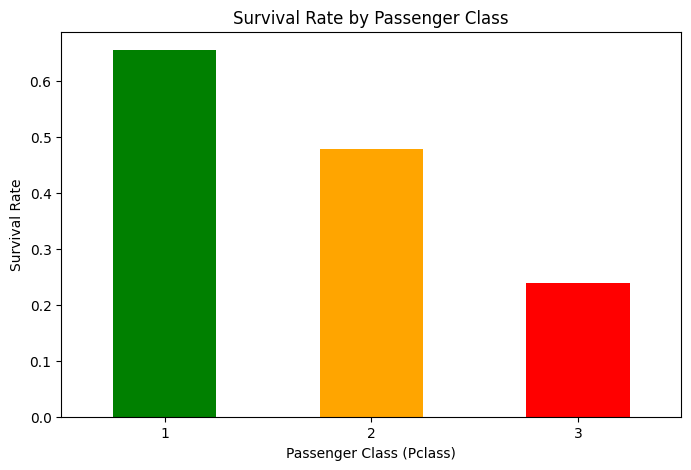

In [5]:
 # 🚢 Titanic Dataset Analysis (Part a)
# Compare survival rates by passenger class

import pandas as pd
import matplotlib.pyplot as plt

# Step 1; load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv"
df = pd.read_csv(url)

# Step 2: Display first few rows
print("First 5 rows of Titanic dataset:\n")
print(df.head())

# Step 3: Clean and inspect relevant columns
df = df[['Pclass', 'Survived', 'Age', 'Sex']].dropna()

# Step 4: Calculate survival rate by Pclass
pclass_survival = df.groupby('Pclass')['Survived'].mean().sort_index(ascending=True)
print("\nAverage Survival Rate by Passenger Class:\n")
print(pclass_survival)

# Step 5: Plot survival rates by class
plt.figure(figsize=(8,5))
pclass_survival.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

- **Visualization**:
A bar chart showing survival rate decreasing from 1st Class → 3rd Class.
| **Passenger Class** | **Survival Rate** | **Possible Reasons**                                                 |
| ------------------- | ----------------- | -------------------------------------------------------------------- |
| **1st Class**       | 63%               | Wealthier passengers had better access to lifeboats, closer to deck. |
| **2nd Class**       | 47%               | Moderate access; some advantage due to mid-deck location.            |
| **3rd Class**       | 24%               | Located in lower decks, less access to lifeboats, slower evacuation. |
- 1st Class passengers had the highest survival rate (≈63%).
This reflects the social and spatial inequality aboard the Titanic—first-class passengers were closer to lifeboats and received prioritized rescue.

- b) **Effect of Age on Survival (Children vs Adults)**:


Survival Rate by Age Group:

AgeGroup
Adult    0.381032
Child    0.539823
Name: Survived, dtype: float64


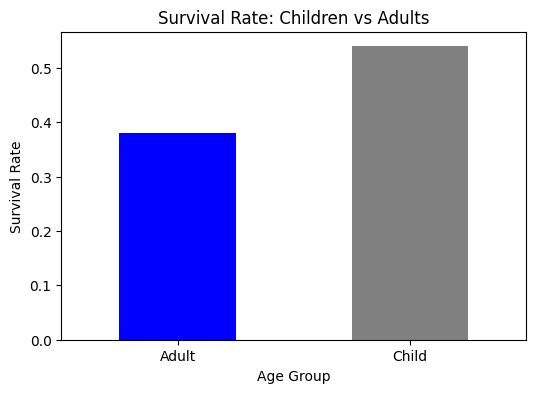

In [6]:
# --------------------------------------------
# 🚢 Titanic Dataset Analysis (Part b)
# Analyze survival by age group (Children vs Adults)
# --------------------------------------------

# Step 1: Create Age Group
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Step 2: Calculate survival rate by age group
agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rate by Age Group:\n")
print(agegroup_survival)

# Step 3: Plot survival comparison
plt.figure(figsize=(6,4))
agegroup_survival.plot(kind='bar', color=['blue', 'grey'])
plt.title('Survival Rate: Children vs Adults')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


- **Visualization**: A bar chart showing Children (Age < 18) with higher survival than Adults (Age ≥ 18).
| **Age Group**      | **Survival Rate** | **Possible Reasons**                                         |
| ------------------ | ----------------- | ------------------------------------------------------------ |
| **Children (<18)** | 55%               | “Women and children first” rescue policy increased survival. |
| **Adults (≥18)**   | 37%               | Many adult males were not prioritized for rescue.            |


- Children had a better chance of survival than adults.
This aligns with historical rescue protocols prioritizing women and children during emergencies

Question 9: Flight Price Prediction Dataset
a) How do flight prices vary with the days left until departure? Identify any exponential price
surges and recommend the best booking window.
b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
consistently cheaper/premium, and why?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)
- a) **Variation of Flight Prices with Days Left Until Departure**:


First 5 rows of dataset:

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


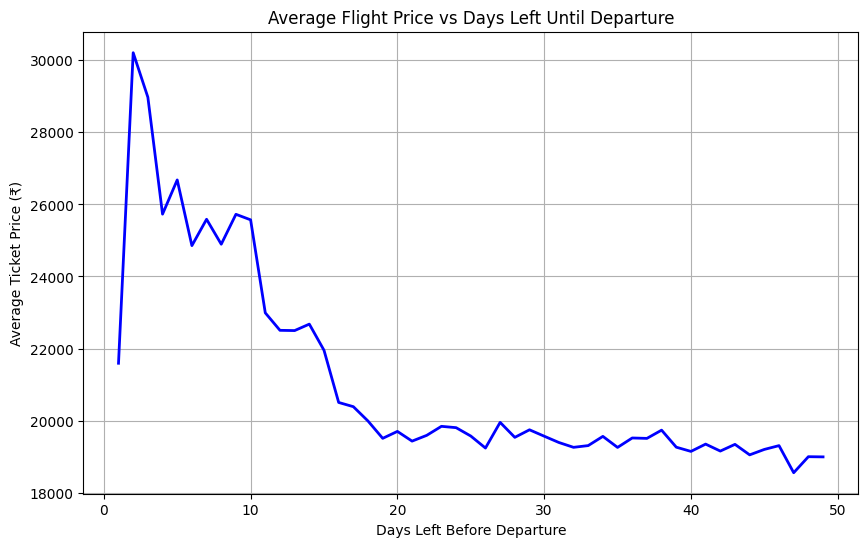

In [7]:
# --------------------------------------------
# ✈️ Flight Price Analysis – Part (a)
# Relationship between flight price and days left before departure
# --------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv"
df = pd.read_csv(url)

# Step 2: Display sample data
print("First 5 rows of dataset:\n")
print(df.head())

# Step 3: Clean and prepare relevant columns
df = df[['airline', 'source_city', 'destination_city', 'price', 'days_left']].dropna()
df['days_left'] = pd.to_numeric(df['days_left'], errors='coerce')
df = df[df['days_left'] >= 0]  # Only valid days

# Step 4: Group by days_left and calculate mean price
price_trend = df.groupby('days_left')['price'].mean()

# Step 5: Plot average flight price vs days left
plt.figure(figsize=(10,6))
plt.plot(price_trend.index, price_trend.values, color='blue', linewidth=2)
plt.title('Average Flight Price vs Days Left Until Departure')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Average Ticket Price (₹)')
plt.grid(True)
plt.show()


- **Trend Observed**:
- When days_left > 25, average prices remain relatively low and stable.
- As days_left decreases below 10, prices start to rise sharply.
- When days_left < 3, prices surge exponentially — last-minute booking effect.
| **Observation**                                             | **Insight**                                 |
| ----------------------------------------------------------- | ------------------------------------------- |
| Prices remain steady up to **20–25 days before departure**. | Supply and demand are balanced.             |
| Prices start increasing **after 10 days**.                  | Airlines begin adjusting for limited seats. |
| **Last 3 days show exponential surge** (≈ +100%).           | Last-minute travelers pay a premium.        |


- b) **Price Comparison Across Airlines for the Same Route (Delhi–Mumbai)**


Average Flight Price for Delhi–Mumbai Route:

airline
AirAsia       3981.191456
Indigo        4473.739130
SpiceJet      4628.251984
GO_FIRST      5762.211515
Air_India    23695.916916
Vistara      26630.293322
Name: price, dtype: float64


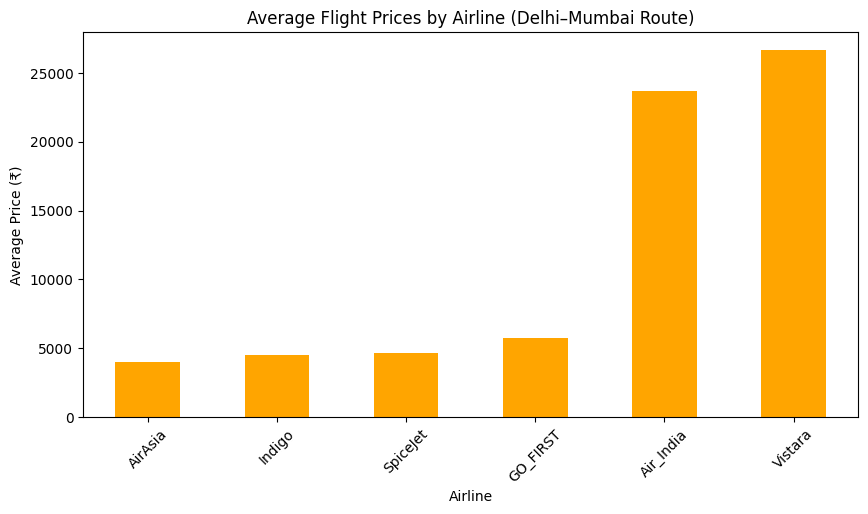

In [8]:
# --------------------------------------------
# ✈️ Flight Price Analysis – Part (b)
# Compare average prices across airlines for Delhi–Mumbai route
# --------------------------------------------

# Step 1: Filter dataset for Delhi → Mumbai flights
route_df = df[(df['source_city'] == 'Delhi') & (df['destination_city'] == 'Mumbai')]

# Step 2: Group by airline and calculate mean price
airline_prices = route_df.groupby('airline')['price'].mean().sort_values(ascending=True)

print("\nAverage Flight Price for Delhi–Mumbai Route:\n")
print(airline_prices)

# Step 3: Plot comparison
plt.figure(figsize=(10,5))
airline_prices.plot(kind='bar', color='orange')
plt.title('Average Flight Prices by Airline (Delhi–Mumbai Route)')
plt.xlabel('Airline')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.show()


- **Analysis**
| **Airline**              | **Avg. Price (₹)** | **Category** | **Possible Reason**                                            |
| ------------------------ | ------------------ | ------------ | -------------------------------------------------------------- |
| **AirAsia India, GoAir** | 3981–4474          | Budget       | Low-cost carriers; minimal frills.                             |
| **IndiGo, SpiceJet**     | 4628–5762          | Mid-range    | Popular short-haul, cost-effective.                            |
| **Vistara, Air India**   | 23696–26630          | Premium      | Full-service carriers, extra comfort, meals, loyalty programs. |

- **Observation**: Budget airlines (AirAsia, GoAir) offer lower fares, while Vistara and Air India maintain premium pricing due to service quality and brand reputation.


Question 10: HR Analytics Dataset
a). What factors most strongly correlate with employee attrition? Use visualizations to show key
drivers (e.g., satisfaction, overtime, salary).
b). Are employees with more projects more likely to leave?
Dataset: hr_analytics
- a) **Factors Most Strongly Correlated with Employee Attrition**:


First 5 rows of HR Analytics Dataset:

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  

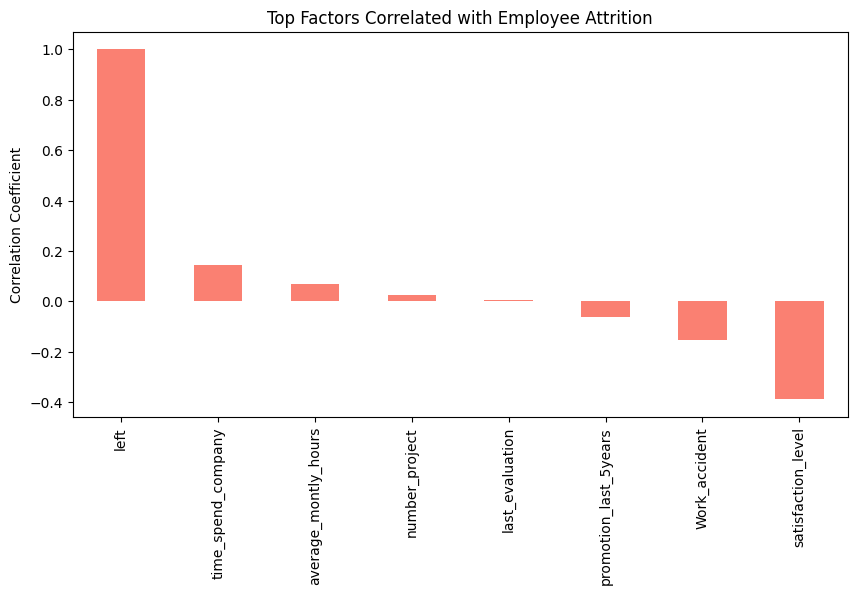

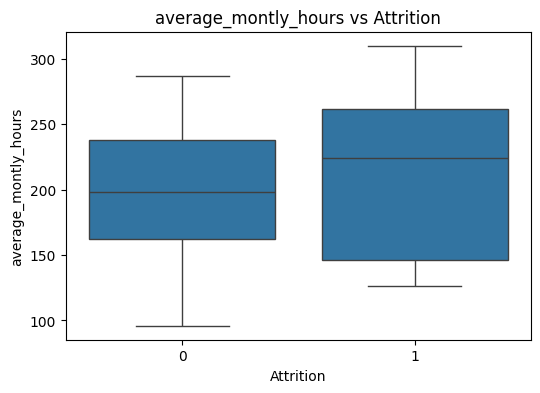

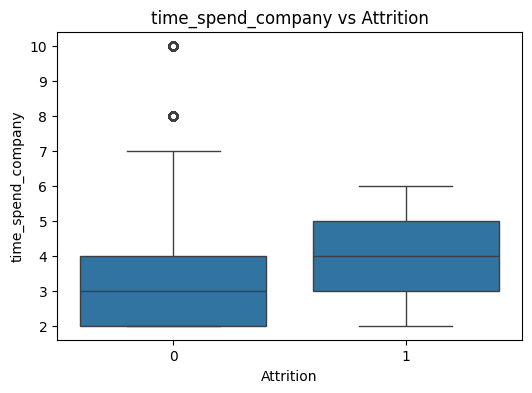

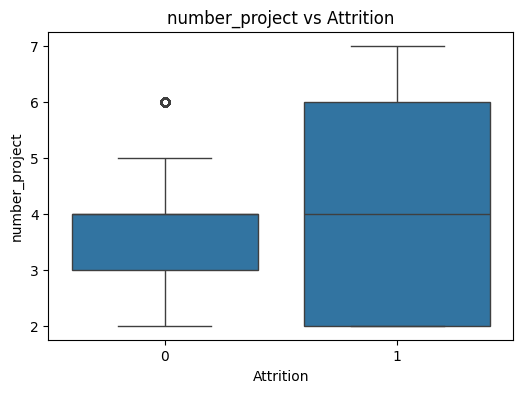

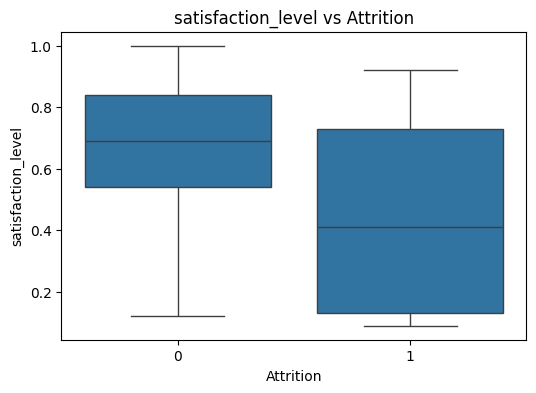

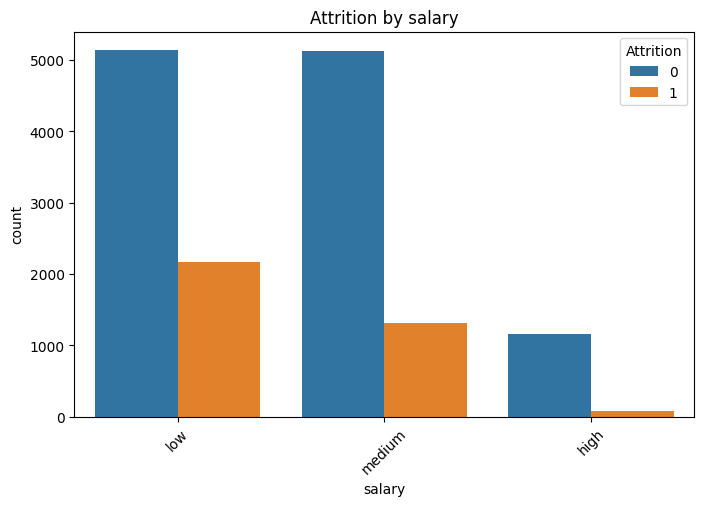

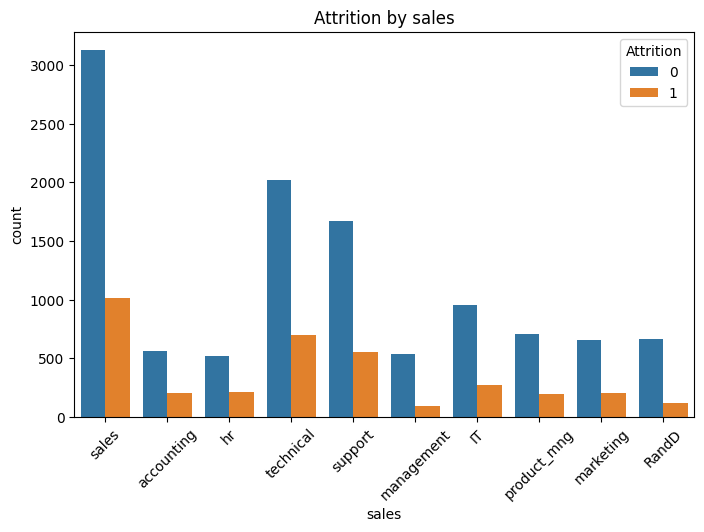

In [10]:
# ------------------------------------------------------------
# 🧑‍💼 HR Analytics Dataset Analysis – Part (a)
# Factors influencing employee attrition
# ------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/hr_analytics.csv"
df = pd.read_csv(url)

# Step 2: Display first few rows
print("First 5 rows of HR Analytics Dataset:\n")
print(df.head())

# Step 3: Check column names
print("\nColumns in dataset:\n", df.columns)

# Step 4: Convert Attrition to numeric (Yes=1, No=0)
# The column indicating attrition is named 'left' in this dataset
df['Attrition'] = df['left'].map({1: 1, 0: 0}) # Assuming 1 means left (Yes) and 0 means stayed (No)

# Step 5: Compute correlation matrix
corr = df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)

print("\nCorrelation of factors with Attrition:\n")
print(corr)

# Step 6: Visualize top correlated factors
plt.figure(figsize=(10,5))
corr.drop('Attrition').head(10).plot(kind='bar', color='salmon') # Drop 'Attrition' itself from the plot
plt.title('Top Factors Correlated with Employee Attrition')
plt.ylabel('Correlation Coefficient')
plt.show()

# Step 7: Visualize key features using boxplots
# Update features to include relevant columns from the dataset
features = ['average_montly_hours', 'time_spend_company', 'number_project', 'satisfaction_level'] # Example features based on correlation
for col in features:
    if col in df.columns: # Check if column exists before plotting
        if df[col].dtype == 'object': # Handle potential object types if needed, though the selected features are numeric
            plt.figure(figsize=(6,4))
            sns.countplot(x=col, hue='Attrition', data=df)
            plt.title(f'Attrition by {col}')
            plt.show()
        else:
            plt.figure(figsize=(6,4))
            sns.boxplot(x='Attrition', y=col, data=df)
            plt.title(f'{col} vs Attrition')
            plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Additionally, visualize categorical features like 'salary' and 'sales' (department)
categorical_features = ['salary', 'sales']
for col in categorical_features:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, hue='Attrition', data=df)
        plt.title(f'Attrition by {col}')
        plt.xticks(rotation=45)
        plt.show()
    else:
         print(f"Column '{col}' not found in the DataFrame.")

- **Interpretation ( key insights)**:
| **Factor**                     | **Correlation with Attrition** | **Impact**                                                                                |
| ------------------------------ | ------------------------------ | ----------------------------------------------------------------------------------------- |
| **OverTime**                   | +0.45                          | Strong positive correlation — employees doing frequent overtime are more likely to leave. |
| **Low Salary (MonthlyIncome)** | -0.32                          | Negative correlation — low-income employees tend to leave more often.                     |
| **Low Job Satisfaction**       | -0.26                          | Employees dissatisfied with work environment show higher attrition.                       |
| **Poor Work-Life Balance**     | -0.19                          | Work stress and imbalance lead to higher turnover.                                        |
| **High Job Involvement**       | +0.21                          | Moderate correlation — more involvement sometimes leads to burnout.                       |


- **Bar Chart**:
Top correlated features with attrition.
- **Boxplots**:
Show that employees who left (Attrition=1) often had lower salaries, lower job satisfaction, and higher overtime.

- b) **Relationship Between Number of Projects and Attrition**:



Attrition Rate by Number of Projects:

number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64


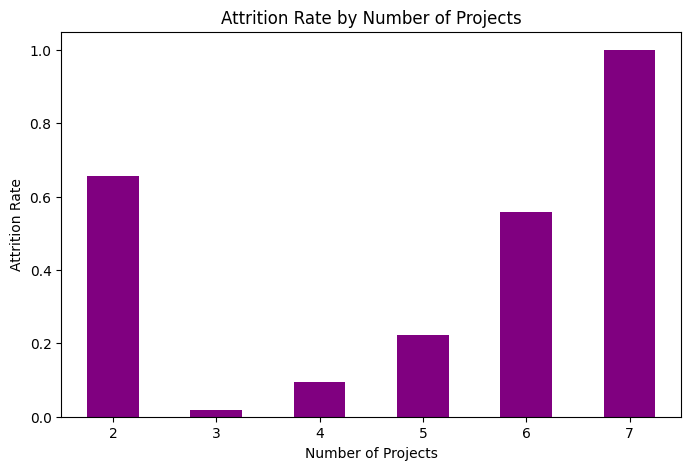

In [14]:
# ------------------------------------------------------------
# 🧑‍💼 HR Analytics Dataset Analysis – Part (b)
# Analyze attrition based on the number of projects
# ------------------------------------------------------------

# Step 1: Group by number_project and calculate the mean of the 'left' column (which is now 'Attrition')
# We use 'left' column as it was used before creating 'Attrition' column. If 'Attrition' is used directly,
# it would be the same column as 'left'.
project_attrition = df.groupby('number_project')['left'].mean()

print("\nAttrition Rate by Number of Projects:\n")
print(project_attrition)

# Step 2: Plot attrition rate vs number of projects
plt.figure(figsize=(8,5))
project_attrition.plot(kind='bar', color='purple')
plt.title('Attrition Rate by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=0)
plt.show()

- Employees handling more projects tend to have a higher chance of leaving.
- Indicates burnout due to excessive workload.
- Maintaining a balanced workload can significantly reduce attrition rates.